In [13]:
3

3

In [ ]:
import os
import random
import time

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
erre=333
3

3

## Заполняем 

In [ ]:
def get_circles_and_rectangles_dataset(
        width=100,
        height=100,
        N = 10000,
        blur_kernel=(13, 13),
        blurring_sigma=1,
        blurring_degree=3,
        noise=0.1,
        R=40):

    circles    = np.zeros((N, height, width, 3), dtype="uint8")
    rectangles = np.zeros((N, height, width, 3), dtype="uint8")

    for i in range(N):
        x = random.randint(R // 2, width - R // 2 ) 
        y = random.randint(R // 2, height - R // 2)
        cv2.circle(circles[i], (x, y), R + np.random.randint(-R // 1.2, R // 1.2), (np.random.randint(10, 256), np.random.randint(10, 256), np.random.randint(10, 256)), -1)
        circles[i] = cv2.GaussianBlur(circles[i], blur_kernel, blurring_sigma, blurring_degree)
        
        x = random.randint(-R // 2, width - R // 2)
        y = random.randint(-R // 2, height - R // 2)

        cv2.rectangle(rectangles[i], (x + (d := np.random.randint(-R  // 1.2, R // 1.2)), y + d),  (x + 2*R + (d := np.random.randint(-R  // 1.2, R // 1.2)), y + 2*R + d), (np.random.randint(10, 256), np.random.randint(10, 256), np.random.randint(10, 256)), -1)
        rectangles[i] = cv2.GaussianBlur(rectangles[i], blur_kernel, blurring_sigma , blurring_degree)

    X = np.concatenate([circles, rectangles])
    for i in range(len(X)):

        
        X[i] = X[i] + noise * np.random.random(size=X.shape)

    Y = np.zeros(shape=(2*N))
    Y[:N] = 0
    Y[N:] = 1
    X = X / 255.0

    return X, Y        

In [19]:
WIDTH, HEIGHT = 100, 100
X, Y = get_circles_and_rectangles_dataset(width=WIDTH, height=HEIGHT)
X.shape
2

ValueError: could not broadcast input array from shape (20000,100,100,3) into shape (100,100,3)

In [ ]:
circles = X[Y == 0]
rectangles = X[Y == 1]

# Посмотрим на образцы

NameError: name 'rectangles' is not defined

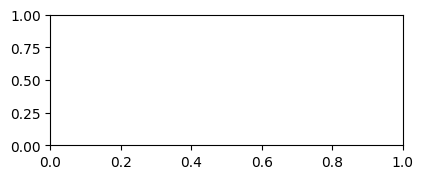

In [ ]:
n_lines = 10
plt.figure(figsize=(10, 2 * n_lines))
for i in range(0, n_lines):
    plt.subplot(n_lines, 2, i*2 + 1)
    plt.imshow(rectangles[random.randint(0, len(rectangles) - 1)])

    plt.subplot(n_lines, 2, i*2 + 2)
    plt.imshow(circles[random.randint(0, len(rectangles) - 1)])



plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

NameError: name 'X' is not defined

# Сначала попробуем нейронной полносвязной сетью

In [ ]:
print(X_train.shape)

NameError: name 'X_train' is not defined

In [ ]:
X_train_flat, X_test_flat = X_train.reshape(-1, WIDTH * HEIGHT * 3), X_test.reshape(-1, WIDTH * HEIGHT * 3)


In [ ]:
Y_train_flat = Y_train.reshape(-1)


In [ ]:
X_test.shape

(4000, 100, 100, 3)

In [ ]:

Y_test_flat =  Y_test.reshape(-1)

In [ ]:
import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense


In [ ]:
model = Sequential()
model.reset_states()
model.add(Dense(100,  input_dim=WIDTH * HEIGHT * 3, activation='sigmoid', kernel_initializer='random_normal', bias_initializer='random_normal'))
# model.add(Dense(33, activation='sigmoid', kernel_initializer='random_normal', bias_initializer='random_normal'))
# model.add(Dense(3, activation='sigmoid', kernel_initializer='random_normal', bias_initializer='random_normal'))
# model.add(Dense(3,  activation='sigmoid', kernel_initializer='random_normal', bias_initializer='random_normal'))

model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal', bias_initializer='random_normal'))

adam = optimizers.Adam() # Might also be decay=1e-6, momentum=0.9, nesterov=True

model.compile(loss='MSE', optimizer=adam, metrics=['accuracy', ])


# With crossentropy: 
#model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
start_time = time.time()

adam = optimizers.Adam(0.0001) # Might also be decay=1e-6, momentum=0.9, nesterov=True
model.fit(X_train_flat, Y_train, batch_size=1500, epochs=1000, verbose=1,validation_data=[X_test_flat, Y_test])
print(f"It took {time.time() - start_time} sec")

Epoch 1/1000


2023-01-02 08:44:30.758059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - ETA: 0s - loss: 0.2027 - accuracy: 0.6903

2023-01-02 08:44:34.114217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 4s 298ms/step - loss: 0.2027 - accuracy: 0.6903 - val_loss: 0.1809 - val_accuracy: 0.7360
Epoch 2/1000
11/11 [==============================] - 1s 134ms/step - loss: 0.1715 - accuracy: 0.7563 - val_loss: 0.1676 - val_accuracy: 0.7598
Epoch 3/1000
11/11 [==============================] - 1s 128ms/step - loss: 0.1610 - accuracy: 0.7739 - val_loss: 0.1590 - val_accuracy: 0.7793
Epoch 4/1000
11/11 [==============================] - 1s 136ms/step - loss: 0.1533 - accuracy: 0.7879 - val_loss: 0.1519 - val_accuracy: 0.7958
Epoch 5/1000
11/11 [==============================] - 1s 133ms/step - loss: 0.1464 - accuracy: 0.8024 - val_loss: 0.1465 - val_accuracy: 0.8065
Epoch 6/1000
11/11 [==============================] - 1s 131ms/step - loss: 0.1398 - accuracy: 0.8167 - val_loss: 0.1406 - val_accuracy: 0.8135
Epoch 7/1000
11/11 [==============================] - 1s 131ms/step - loss: 0.1335 - accuracy: 0.8291 - val_loss: 0.1349 - val_accuracy: 0.8283
Epoch

KeyboardInterrupt: 

In [ ]:
# Test accuracy
y_pred_test = model.predict(X_test_flat)
(np.round(y_pred_test).reshape(Y_test.shape) == Y_test).sum() / len(Y_test)

 76/125 [=================>............] - ETA: 0s

2023-01-02 08:21:21.543073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 0s 2ms/step


0.7765

In [ ]:
3+5

8

In [ ]:
2

2

In [ ]:
2

2